In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ipywidgets import interact

ModuleNotFoundError: No module named 'numpy'

In [2]:
!pip install scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# For predictive data analysis
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve 

In [ ]:
data=pd.read_csv('/content/data (4).csv')

In [ ]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
print("shape of dataset:",data.shape)

shape of dataset: (2200, 8)


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
print("Avarage Ratio of Nitrogen in the soil: {0:.2f}".format(data['N'].mean()))
print("Avarage Ratio of Phosphorous in the soil: {0:.2f}".format(data['P'].mean()))
print("Avarage Ratio of Potasium in the soil: {0:.2f}".format(data['K'].mean()))
print("Avarage Temperature in Celsius: {0:.2f}".format(data['temperature'].mean()))
print("Avarage Relative Humidity in %: {0:.2f}".format(data['humidity'].mean()))
print("Avarage pH Value of the soil: {0:.2f}".format(data['ph'].mean()))
print("Avarage Rain fall in mm: {0:.2f}".format(data['rainfall'].mean()))

Avarage Ratio of Nitrogen in the soil: 50.55
Avarage Ratio of Phosphorous in the soil: 53.36
Avarage Ratio of Potasium in the soil: 48.15
Avarage Temperature in Celsius: 25.62
Avarage Relative Humidity in %: 71.48
Avarage pH Value of the soil: 6.47
Avarage Rain fall in mm: 103.46


In [ ]:
@interact
def summary(crops=list(data['label'].value_counts().index)):
  x=data[data['label']==crops]
  print("........................................")
  print("Statistic for Nitrogen")
  print("Minimum Nitrogen required:",x['N'].min())
  print("Avarage Nitrogen required:",x['N'].mean())
  print("MMaximum Nitrogen required:",x['N'].max())
  print("........................................")
  print("Statistic for Phosphorous")
  print("Minimum Phosphorous required:",x['P'].min())
  print("Avarage Phosphorous required:",x['P'].mean())
  print("MMaximum Phosphorous required:",x['P'].max())
  print("........................................")
  print("Statistic for Potassium")
  print("Minimum Potassium required:",x['K'].min())
  print("Avarage Potassium required:",x['K'].mean())
  print("Maximum Potassium required:",x['K'].max())
  print("........................................")
  print("Statistic for Temperature")
  print("Minimum Temperature required:{0:2f}".format(x['temperature'].min()))
  print("Avarage Temperature required:{0:2f}".format(x['temperature'].mean()))
  print("Maximum Temperature required:{0:2f}".format(x['temperature'].max()))
  print("........................................")
  print("Statistic for humidity")
  print("Minimum humidity required:{0:2f}".format(x['humidity'].min()))
  print("Avarage humidity required:{0:2f}".format(x['humidity'].mean()))
  print("Maximum humidity required:{0:2f}".format(x['humidity'].max()))
  print("........................................")
  print("Statistic for ph")
  print("Minimum ph required:{0:2f}".format(x['ph'].min()))
  print("Avarage ph required:{0:2f}".format(x['ph'].mean()))
  print("Maximum ph required:{0:2f}".format(x['ph'].max()))
  print("........................................")
  print("Statistic for rainfall")
  print("Minimum rainfall required:{0:2f}".format(x['rainfall'].min()))
  print("Avarage rainfall required:{0:2f}".format(x['rainfall'].mean()))
  print("Maximum rainfall required:{0:2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
@interact
def compare(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
  print("Average Value for",conditions,"is {0:.2f}".format(data[conditions].mean()))
  print(".............................................")
  print("Rice : {0:.2f}".format(data[(data['label']=='rice')][conditions].mean()))
  print("Black Grams : {0:.2f}".format(data[(data['label']=='blackgram')][conditions].mean()))
  print("Banana : {0:.2f}".format(data[(data['label']=='banana')][conditions].mean()))
  print("Jute : {0:.2f}".format(data[(data['label']=='jute')][conditions].mean()))
  print("Coconut : {0:.2f}".format(data[(data['label']=='coconut')][conditions].mean()))
  print("Apple : {0:.2f}".format(data[(data['label']=='apple')][conditions].mean()))
  print("Papaya : {0:.2f}".format(data[(data['label']=='jute')][conditions].mean()))  
  print("Muskmelon : {0:.2f}".format(data[(data['label']=='muskmelon')][conditions].mean()))
  print("Wataermelon : {0:.2f}".format(data[(data['label']=='watermelon')][conditions].mean()))
  print("Kidney Beans : {0:.2f}".format(data[(data['label']=='kindeybeans')][conditions].mean()))
  print("Mung Beans : {0:.2f}".format(data[(data['label']=='mungbean')][conditions].mean()))
  print("Oranges : {0:.2f}".format(data[(data['label']=='oranges')][conditions].mean()))
  print("Chick Peas : {0:.2f}".format(data[(data['label']=='chickpea')][conditions].mean()))
  print("Lentils : {0:.2f}".format(data[(data['label']=='lentils')][conditions].mean()))
  print("Cotton : {0:.2f}".format(data[(data['label']=='cotton')][conditions].mean()))
  print("Maize : {0:.2f}".format(data[(data['label']=='maize')][conditions].mean()))
  print("Moth Beans : {0:.2f}".format(data[(data['label']=='mothbeans')][conditions].mean()))
  print("Pigeon Peas : {0:.2f}".format(data[(data['label']=='pigeonpeas')][conditions].mean()))
  print("Mango : {0:.2f}".format(data[(data['label']=='mango')][conditions].mean()))
  print("Pomegranate : {0:.2f}".format(data[(data['label']=='pomegranate')][conditions].mean()))
  print("Coffee : {0:.2f}".format(data[(data['label']=='coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [ ]:
@interact
def compare(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
  print("Crops which require greater than average",conditions,'\n')
  print(data[data[conditions] > data[conditions].mean()]['label'].unique())
  print("..................................")
  print("Crops which require less than average",conditions,'\n')
  print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

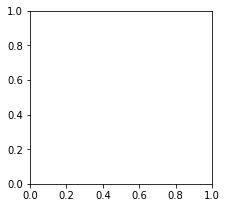

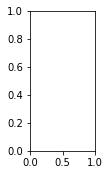

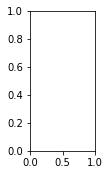

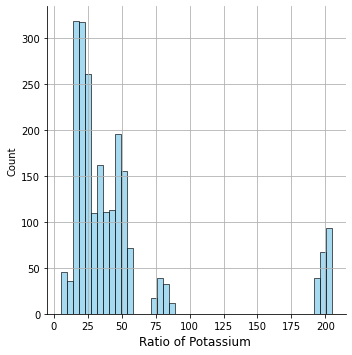

In [ ]:
plt.rcParams['figure.figsize'] = (15,7)
plt.subplot(2,4,1)
sns.displot(data['N'],color="lightgrey")
plt.xlabel('Ratio of Nitrogen',fontsize=12)
plt.grid()

plt.subplot(2,4,1)
sns.displot(data['P'],color="skyblue")
plt.xlabel('Ratio of Phosphorous',fontsize=12)
plt.grid()

plt.subplot(2,4,1)
sns.displot(data['K'],color="skyblue")
plt.xlabel('Ratio of Potassium ',fontsize=12)
plt.grid()

In [ ]:
print("Some Intersting Patterns")
print(".................................")
print("Crops which requiers very High Ratio of Nitrogen Content in Soil:",data[data['N']>120]['label'].unique())
print("Crops which requiers very High Ratio of Phosphorous Content in Soil:",data[data['P']>100]['label'].unique())
print("Crops which requiers very High Ratio of Potassium Content in Soil:",data[data['K']>200]['label'].unique())
print("Crops which requiers very High Rainfall:",data[data['rainfall']>120]['label'].unique())
print("Crops which requiers very High  temperature :",data[data['temperature']<10]['label'].unique())
print("Crops which requiers very low temperature :",data[data['temperature']>40]['label'].unique())
print("Crops which requiers very  low humidity :",data[data['humidity']<20]['label'].unique())


Some Intersting Patterns
.................................
Crops which requiers very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requiers very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requiers very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requiers very High Rainfall: ['rice' 'kidneybeans' 'pigeonpeas' 'apple' 'papaya' 'coconut' 'jute'
 'coffee']
Crops which requiers very High  temperature : ['grapes']
Crops which requiers very low temperature : ['grapes' 'papaya']
Crops which requiers very  low humidity : ['chickpea' 'kidneybeans']


In [ ]:
print("Summer Crops")
print(data[(data['temperature'] >30) & (data['humidity'] >50)]['label'].unique())
print("..................................")
print("Wintwer Crops")
print(data[(data['temperature'] <20) & (data['humidity'] >30)]['label'].unique())
print("..................................")
print("Rainy Crops")
print(data[(data['rainfall'] >200) & (data['humidity'] >50)]['label'].unique())




Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
..................................
Wintwer Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
..................................
Rainy Crops
['rice' 'papaya' 'coconut']


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++')
import warnings
warnings.filterwarnings('ignore')
x=data.loc[:,['N','P','K','temperature','humidity','ph','rainfall']].values
print(x.shape)
x_data=pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


In [ ]:
km=KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means=km.fit_predict(x)


a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})
print("Crop in first cluster :", z[z['cluster']==0]['label'].unique())
print("Crop in first cluster :", z[z['cluster']==1]['label'].unique())
print("Crop in first cluster :", z[z['cluster']==2]['label'].unique())
print("Crop in first cluster :", z[z['cluster']==3]['label'].unique())


Crop in first cluster : ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Crop in first cluster : ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Crop in first cluster : ['grapes' 'apple']
Crop in first cluster : ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [ ]:
y=data['label']
x=data.drop(['label'],axis=1)
print("shape of x:",x.shape)
print("shape of y:",y.shape)

shape of x: (2200, 7)
shape of y: (2200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=0)
print("The shape of x train",x_train.shape)
print("The shape of y train",y_train.shape)
print("The shape of x test",x_test.shape)
print("The shape of y test",x_test.shape)

The shape of x train (1760, 7)
The shape of y train (1760,)
The shape of x test (440, 7)
The shape of y test (440, 7)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
Logistic_model=accuracy_score(y_pred,y_test)*100
print("Accuracy:",Logistic_model)


Accuracy: 96.81818181818181


In [ ]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
svm_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", svm_model_acc)

Accuracy: 97.72727272727273


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
prediction=svm_model.predict((np.array([[90,
                                     40,
                                     40,
                                     20,
                                     45,
                                     7,
                                     2000]])))
print("The suggested crop is given climatic condition is:", prediction)


The suggested crop is given climatic condition is: ['papaya']


# N,P,K,TEMP,HUM,PH,RAIN

In [ ]:
prediction=model.predict((np.array([[90,
                                     42,
                                     43,
                                     20,
                                     82,
                                     6.5,
                                     202]])))
print("The suggested crop is given climatic condition is:", prediction)

The suggested crop is given climatic condition is: ['rice']


In [ ]:
import pickle
with open('model', 'wb') as files:
    pickle.dump(svm_model, files)